array([2.4118242 , 1.3351604 , 0.7874726 , 0.43988408, 0.39022312])

In [1]:
import os
import glob

In [7]:

extension = 'csv'
result = [i for i in glob.glob('*.{}'.format(extension))]

In [8]:
import pandas as pd
import numpy as np
allof=[]
for i,res in enumerate(result):
    print(res)
    temp = pd.read_csv(result[i]).groupby("NumThreads").mean().Time.values
    allof.append((temp,res))


O0_naive_results_input4.csv
O0_numa_results_input4.csv
O3_bitwise_results_input4.csv
O0_bitwise_results_input4.csv
O3_numa_results_input2.csv
O0_numa_results_input2.csv
O0_trans_results_input4.csv
O0_simd_results_input4.csv
O3_simd_results_input4.csv
O3_numa_results_input1.csv
O0_numa_results_input3.csv
O3_numa_results_input3.csv
O0_numa_results_input1.csv
O3_naive_results_input4.csv
O3_trans_results_input4.csv
O3_numa_results_input4.csv


res


In [142]:
naive_results_O3 = []
naive_results_O0 = []
simd_results_O3 = []
simd_results_O0 = []
bitwise_result_O3=[]
bitwise_result_O0=[]
trans_result_O3 = []
trans_result_O0 = []
numa_result_O3 = []

#numa_result_O3_1 = []
#numa_result_O3_2 = []
#numa_result_O3_3 = []

for elem in allof:
    if elem[1].find("input4") == -1:
        continue
    if elem[1].find("O3_naive") != -1:
        naive_results_O3.append(elem[0])
    if elem[1].find("O0_naive") != -1:
        naive_results_O0.append(elem[0])
    if elem[1].find("O3_simd") != -1:
        simd_results_O3.append(elem[0])
    if elem[1].find("O0_simd") != -1:
        simd_results_O0.append(elem[0])

    if elem[1].find("O3_bitwise_result") != -1:
        bitwise_result_O3.append(elem[0])

    if elem[1].find("O0_bitwise_result") != -1:
        bitwise_result_O0.append(elem[0])

    if elem[1].find("O3_trans") != -1:
        trans_result_O3.append(elem[0])

    if elem[1].find("O0_trans") != -1:
        trans_result_O0.append(elem[0])

    if elem[1].find("O3_numa") != -1:
        numa_result_O3.append(elem[0])
    if elem[1].find("O0_numa") != -1:
        numa_result_O0.append(elem[0])


In [10]:
import seaborn as sns

In [113]:
tmp = pd.Series(numa_result_O3)
rn = pd.Series([1,2,4,8,16])
pd.concat([rn,tmp],axis=1)

,0,1
0,1,"[0.0005068511199999998, 0.0003927857399999999,..."
1,2,NaN
2,4,NaN
3,8,NaN
4,16,NaN


In [131]:
import matplotlib.pyplot as plt
sns.set()
numa_result_O3[0]

array([0.00050685, 0.00039279, 0.00030739, 0.00029588, 0.00054373])

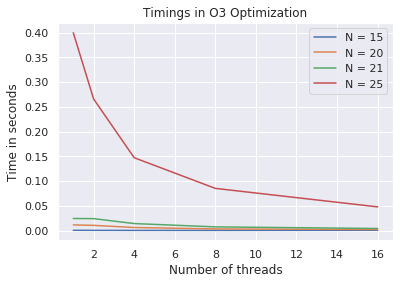

In [143]:
plt.title("Timings in O3 Optimization")
plt.plot([1,2,4,8,16],numa_result_O3_1[0])
plt.plot([1,2,4,8,16],numa_result_O3_2[0])
plt.plot([1,2,4,8,16],numa_result_O3_3[0])
plt.plot([1,2,4,8,16],numa_result_O3[0])

plt.xlabel("Number of threads")
plt.ylabel("Time in seconds")

plt.legend(["N = 15","N = 20","N = 21","N = 25","numa"])

Text(0, 0.5, 'Time in seconds')

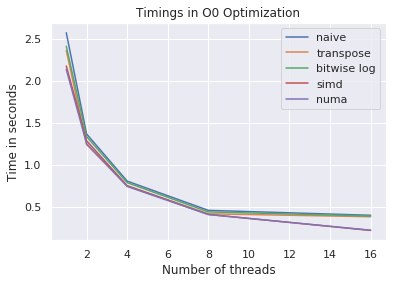

In [111]:
plt.title("Timings in O0 Optimization")
plt.plot([1,2,4,8,16],naive_results_O0[0])
plt.plot([1,2,4,8,16],trans_result_O0[0])
plt.plot([1,2,4,8,16],bitwise_result_O0[0])
plt.plot([1,2,4,8,16],simd_results_O0[0])
plt.plot([1,2,4,8,16],numa_result_O0[0])
plt.legend(["naive","transpose","bitwise log","simd","numa"])
plt.xlabel("Number of threads")
plt.ylabel("Time in seconds")

Text(0, 0.5, 'Speedup')

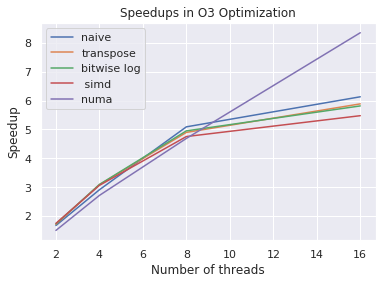

In [109]:
plt.title("Speedups in O3 Optimization")
plt.plot([2,4,8,16],(naive_results_O3[0][0]/naive_results_O3[0])[1:])
plt.plot([2,4,8,16],(trans_result_O3[0][0]/trans_result_O3[0])[1:])
plt.plot([2,4,8,16],(bitwise_result_O3[0][0]/bitwise_result_O3[0])[1:])

plt.plot([2,4,8,16],(simd_results_O3[0][0]/simd_results_O3[0])[1:])
plt.plot([2,4,8,16],(numa_result_O3[0][0]/numa_result_O3[0])[1:])
plt.legend(["naive","transpose","bitwise log"," simd","numa"])
plt.xlabel("Number of threads")
plt.ylabel("Speedup")

Text(0, 0.5, 'Speedup')

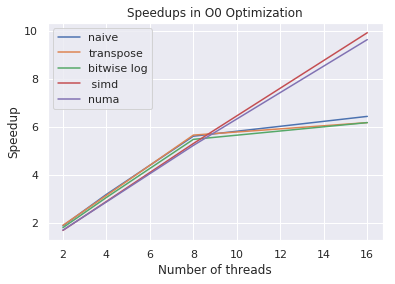

In [110]:
plt.title("Speedups in O0 Optimization")
plt.plot([2,4,8,16],(naive_results_O0[0][0]/naive_results_O0[0])[1:])
plt.plot([2,4,8,16],(trans_result_O0[0][0]/trans_result_O0[0])[1:])
plt.plot([2,4,8,16],(bitwise_result_O0[0][0]/bitwise_result_O0[0])[1:])

plt.plot([2,4,8,16],(simd_results_O0[0][0]/simd_results_O0[0])[1:])
plt.plot([2,4,8,16],(numa_result_O0[0][0]/numa_result_O0[0])[1:])
plt.legend(["naive","transpose","bitwise log"," simd","numa"])
plt.xlabel("Number of threads")
plt.ylabel("Speedup")

In [17]:
naive_results_O3

[array([0.89134176, 0.53275012, 0.30620326, 0.17505914, 0.1453359 ])]

In [78]:
d = {"naive":pd.Series(naive_results_O3[0],index=[1,2,4,8,16]),
    "bitwise":pd.Series(bitwise_result_O3[0],index=[1,2,4,8,16]),
     "trans":pd.Series(trans_result_O3[0],index=[1,2,4,8,16]),
    "simd":pd.Series(simd_results_O3[0],index=[1,2,4,8,16])
    ,"numa":pd.Series(numa_result_O3[0],index=[1,2,4,8,16])}

d = pd.DataFrame(d)
d.index.name = "Num threads"
d= d.transpose()
d.to_csv("O3_timings.csv")
O3time = d

In [88]:
O3time

Num threads,1,2,4,8,16
naive,0.891342,0.532750,0.306203,0.175059,0.145336
bitwise,0.673558,0.389929,0.217729,0.136017,0.115805
trans,0.638270,0.372538,0.206570,0.130297,0.108410
simd,0.472302,0.270185,0.154181,0.099316,0.086214
numa,0.399646,0.265914,0.147188,0.085206,0.047850


In [89]:
O0time

Num threads,1,2,4,8,16
naive,2.572285,1.367526,0.806103,0.458080,0.399450
bitwise,2.411824,1.335160,0.787473,0.439884,0.390223
trans,2.361621,1.240751,0.750488,0.417197,0.382152
simd,2.175905,1.286362,0.750958,0.409846,0.219284
numa,2.135494,1.252519,0.742596,0.408255,0.221592


In [79]:
d = {"naive":pd.Series(naive_results_O0[0],index=[1,2,4,8,16]),
    "bitwise":pd.Series(bitwise_result_O0[0],index=[1,2,4,8,16]),
    "trans":pd.Series(trans_result_O0[0],index=[1,2,4,8,16]),

    "simd":pd.Series(simd_results_O0[0],index=[1,2,4,8,16])
    ,"numa":pd.Series(numa_result_O0[0],index=[1,2,4,8,16])}

d = pd.DataFrame(d)
d.index.name = "Num threads"
d= d.transpose()
d.to_csv("O0_timings.csv")
O0time = d

In [80]:
sp = {"naive":pd.Series((naive_results_O0[0][0]/naive_results_O0[0])[1:],[2,4,8,16]),
     "bitwise":pd.Series((bitwise_result_O0[0][0]/bitwise_result_O0[0])[1:],[2,4,8,16]),
     "trans":pd.Series((trans_result_O0[0][0]/trans_result_O0[0])[1:],[2,4,8,16]),
     "simd":pd.Series((simd_results_O0[0][0]/simd_results_O0[0])[1:],[2,4,8,16]),
     "numa":pd.Series((numa_result_O0[0][0]/numa_result_O0[0])[1:],[2,4,8,16])}



O0Sp = pd.DataFrame(sp)
O0Sp  = O0Sp.transpose()
O0Sp.index.name = "Num threads"
O0Sp

,2,4,8,16
Num threads,,,,
naive,1.880977,3.191011,5.615365,6.439563
bitwise,1.806393,3.062740,5.482863,6.180629
trans,1.903380,3.146780,5.660680,6.179794
simd,1.691519,2.897505,5.309079,9.922753
numa,1.704959,2.875712,5.230782,9.637068


In [105]:
sp = {"naive":pd.Series((naive_results_O0[0][0]/naive_results_O0[0])[1:],[2,4,8,16]),
     "bitwise":pd.Series((bitwise_result_O0[0][0]/bitwise_result_O0[0])[1:],[2,4,8,16]),
     "trans":pd.Series((trans_result_O0[0][0]/trans_result_O0[0])[1:],[2,4,8,16]),
     "simd":pd.Series((simd_results_O0[0][0]/simd_results_O0[0])[1:],[2,4,8,16]),
     "numa":pd.Series((numa_result_O0[0][0]/numa_result_O0[0])[1:],[2,4,8,16])}



O0Sp = pd.DataFrame(sp)
O0Sp  = O0Sp.transpose()
O0Sp.index.name = "Num threads"
O0Sp.to_csv("O0Speedup.csv")

In [106]:
sp = {"naive":pd.Series((naive_results_O3[0][0]/naive_results_O3[0])[1:],[2,4,8,16]),
     "bitwise":pd.Series((bitwise_result_O3[0][0]/bitwise_result_O3[0])[1:],[2,4,8,16]),
     "trans":pd.Series((trans_result_O3[0][0]/trans_result_O3[0])[1:],[2,4,8,16]),
     "simd":pd.Series((simd_results_O3[0][0]/simd_results_O3[0])[1:],[2,4,8,16]),
     "numa":pd.Series((numa_result_O3[0][0]/numa_result_O3[0])[1:],[2,4,8,16])}



O3Sp = pd.DataFrame(sp)
O3Sp  = O3Sp.transpose()
O3Sp.index.name = "Num threads"
O3Sp.to_csv("O3Speedup.csv")

In [83]:
O3time.iloc[0].values[0]/(O3time.iloc[0].values * O3time.columns)[1:]

Float64Index([0.8365476858081234, 0.7277369940476793, 0.6364575994146892,
              0.3833110851017838],
             dtype='float64', name='Num threads')

In [99]:
eff3 = {"naive":pd.Series(O3time.iloc[0].values[0]/(O3time.iloc[0].values * O3time.columns)[1:],[2,4,8,16]),
     "bitwise":pd.Series(O3time.iloc[1].values[1]/(O3time.iloc[1].values * O3time.columns)[1:],[2,4,8,16]),
     "trans":pd.Series(O3time.iloc[2].values[2]/(O3time.iloc[2].values * O3time.columns)[1:],[2,4,8,16]),
     "simd":pd.Series(O3time.iloc[3].values[3]/(O3time.iloc[3].values * O3time.columns)[1:],[2,4,8,16]),
     "numa":pd.Series(O3time.iloc[4].values[4]/(O3time.iloc[4].values * O3time.columns)[1:],[2,4,8,16])}
eff3 = pd.DataFrame(eff3).transpose()
eff3.to_csv("O3_eff.csv")

In [100]:
eff0 = {"naive":pd.Series(O0time.iloc[0].values[0]/(O0time.iloc[0].values * O0time.columns)[1:],[2,4,8,16]),
     "bitwise":pd.Series(O0time.iloc[1].values[1]/(O0time.iloc[1].values * O0time.columns)[1:],[2,4,8,16]),
     "trans":pd.Series(O0time.iloc[2].values[2]/(O0time.iloc[2].values * O0time.columns)[1:],[2,4,8,16]),
     "simd":pd.Series(O0time.iloc[3].values[3]/(O0time.iloc[3].values * O0time.columns)[1:],[2,4,8,16]),
     "numa":pd.Series(O0time.iloc[4].values[4]/(O0time.iloc[4].values * O0time.columns)[1:],[2,4,8,16])}
eff0 = pd.DataFrame(eff0).transpose()
eff0.to_csv("O0_eff.csv")

In [101]:
eff0

,2,4,8,16
naive,0.940488,0.797753,0.701921,0.402473
bitwise,0.500000,0.423875,0.379407,0.213846
trans,0.302433,0.250000,0.224860,0.122740
simd,0.159304,0.136441,0.125000,0.116813
numa,0.088458,0.074600,0.067847,0.062500


In [102]:
eff3

,2,4,8,16
naive,0.836548,0.727737,0.636458,0.383311
bitwise,0.500000,0.447722,0.358347,0.210445
trans,0.277247,0.250000,0.198172,0.119091
simd,0.183793,0.161038,0.125000,0.071999
numa,0.089973,0.081274,0.070198,0.062500
